<a href="https://colab.research.google.com/github/sheikmohdimran/Deep_Learning_with_Pytorch/blob/main/01_Intro_to_NN_Pytorch/00_Universal_Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universal Function Approximation by Neural Nets**

The universal function approximation property of multilayer perceptrons was first noted by Cybenko (1989) and Hornik (1991): George Cybenko (1989), “Approximations by superpositions of sigmoidal functions”, Mathematics of Control, Signals, and Systems Kurt Hornik (1991), “Approximation Capabilities of Multilayer Feedforward Networks”, Neural Networks

*“The universal approximation theorem states that a feed-forward network with a single hidden layer containing a finite number of neurons (i.e., a multilayer perceptron), can approximate continuous functions on compact subsets of Rn, under mild assumptions on the activation function. “*

*“The theorem thus states that simple neural networks can represent a wide variety of interesting functions when given appropriate parameters; however, it does not touch upon the algorithmic learnability of those parameters.”*

In [ ]:
pip install fastai~=2.5 -qqq

In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import math, random
from sklearn.model_selection import train_test_split
from scipy import signal
from fastai.tabular.all import *

%matplotlib inline

In [2]:
NUM_HIDDEN_NODES = 20
NUM_EXAMPLES = 1000

In [3]:
all_x = np.float32(np.random.uniform(-2*math.pi, 2*math.pi, (1, NUM_EXAMPLES))).T
function_to_learn = lambda x: np.sin(x) + 0.1*np.random.randn(*x.shape)
#function_to_learn = lambda x: np.cos(np.pi*x*0.5) + signal.gausspulse(x*0.1,fc=3)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(all_x, function_to_learn(all_x), test_size=0.33, random_state=42)

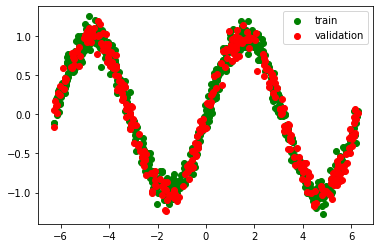

In [5]:
plt.figure(1)
plt.scatter(X_train, y_train, c='green', label='train')
plt.scatter(X_test, y_test, c='red', label='validation')
plt.legend()

In [6]:
N, D_in, H, D_out = NUM_EXAMPLES, 1, NUM_HIDDEN_NODES, 1

In [7]:
model_lin = nn.Sequential(
          nn.Linear(D_in, H),
          nn.Linear(H, D_out),
        )

model_non_lin = nn.Sequential(
          nn.Linear(D_in, H),
          nn.ReLU(),
          nn.Linear(H, D_out),
        )


In [8]:
from torch.utils.data import TensorDataset, DataLoader
train_loader=DataLoader(TensorDataset(torch.from_numpy(X_train.astype(np.float32)),
                                        torch.from_numpy(y_train.astype(np.float32))), 
                          batch_size=32)
test_loader=DataLoader(TensorDataset(torch.from_numpy(X_test.astype(np.float32)),
                                        torch.from_numpy(y_test.astype(np.float32))), 
                          batch_size=64)


In [9]:
data = DataLoaders(train_loader, test_loader)
learn = Learner(data,model_lin,loss_func=MSELossFlat(),                                                    #https://docs.fast.ai/losses.html#L1LossFlat
                )
learn.fit(200)

epoch,train_loss,valid_loss,time
0,1.157222,0.608454,00:00
1,0.750161,0.467094,00:00
2,0.606074,0.432665,00:00
3,0.532695,0.421251,00:00
4,0.492013,0.418185,00:00
5,0.468390,0.416906,00:00
6,0.454055,0.416669,00:00
7,0.445172,0.416672,00:00
8,0.439584,0.416720,00:00
9,0.436051,0.416766,00:00


In [10]:
x = torch.FloatTensor(X_test)
y = torch.FloatTensor(y_test)

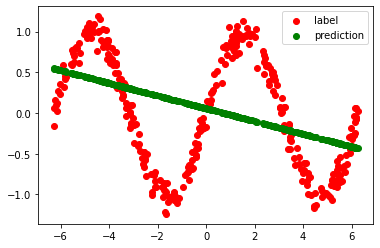

In [11]:
y_pred = model_lin(x)

plt.figure(1)
plt.scatter(X_test, y_test, c='red', label='label')
plt.scatter(X_test, y_pred.data.numpy(), c='green', label='prediction')
plt.legend()

In [12]:
data = DataLoaders(train_loader, test_loader)
learn = Learner(data,model_non_lin,loss_func=MSELossFlat(),                                                    #https://docs.fast.ai/losses.html#MSELossFlat
                )
learn.fit(200)

epoch,train_loss,valid_loss,time
0,0.776198,0.650995,00:00
1,0.665652,0.533769,00:00
2,0.597458,0.490617,00:00
3,0.553829,0.468909,00:00
4,0.523552,0.453608,00:00
5,0.499896,0.437481,00:00
6,0.479474,0.421343,00:00
7,0.460770,0.405435,00:00
8,0.443105,0.390105,00:00
9,0.426207,0.375441,00:00


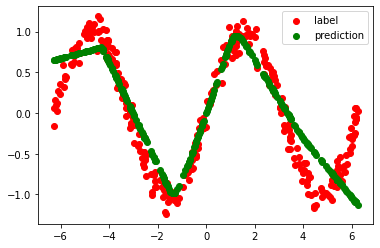

In [13]:
y_pred = model_non_lin(x)

plt.figure(1)
plt.scatter(X_test, y_test, c='red', label='label')
plt.scatter(X_test, y_pred.data.numpy(), c='green', label='prediction')
plt.legend()